In [1]:
%matplotlib inline 

import os
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
eng_levels = [-2, -1, 0, 1, 2, 3]

## Face Features

In [5]:
# Download the Embedding Projector Friendly Face Features and specify the participant name
person_name = "D"
base_dir = "C:\\Users\\ASABUNCUOGLU13\\Documents\\data\\vol02\\face-features\\%s" % person_name

In [12]:
labels = pd.read_csv(os.path.join(base_dir, 'levels.tsv'), delimiter='\t', header=None)
#scores = pd.read_csv(os.path.join(base_dir, 'scores.tsv'), delimiter='\t', header=None)

In [13]:
# Load data
df = pd.read_csv(os.path.join(base_dir, 'features.tsv'), delimiter="\t")
# Remove empty spaces in column names.
df.columns = [col.replace(" ", "") for col in df.columns]
# Print few values of data.
df.head()

,confidence,success,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,gaze_1_z,gaze_angle_x,gaze_angle_y,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,0.98,1,0.309688,0.217516,-0.925624,-0.078749,0.124520,-0.989087,0.120,0.177,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.88,1,-0.744108,-0.003582,-0.668050,-0.731003,0.035917,-0.681428,-0.830,0.024,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.98,1,-0.730967,-0.056477,-0.680072,-0.739313,-0.004669,-0.673346,-0.827,-0.045,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.98,1,-0.688489,-0.079700,-0.720854,-0.715481,0.028073,-0.698068,-0.780,-0.036,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.98,1,-0.623707,-0.017633,-0.781459,-0.733528,0.004099,-0.679647,-0.749,-0.009,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [14]:
print(len(df), len(labels))

5675 5675


In [15]:
df.describe()

,confidence,success,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,gaze_1_z,gaze_angle_x,gaze_angle_y,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
count,5675.000000,5675.000000,5675.000000,5675.000000,5675.000000,5675.000000,5675.000000,5675.000000,5675.000000,5675.000000,...,5675.000000,5675.000000,5675.000000,5675.000000,5675.000000,5675.000000,5675.000000,5675.000000,5675.000000,5675.000000
mean,0.768800,0.774802,0.119600,0.114335,-0.721109,-0.045609,0.076434,-0.740945,0.039668,0.099842,...,0.069956,0.265198,0.135859,0.197181,0.063789,0.134978,0.165463,0.089868,0.005463,0.092335
std,0.358499,0.417750,0.218015,0.161054,0.392426,0.200076,0.129385,0.401432,0.209249,0.147826,...,0.255095,0.441478,0.342669,0.397905,0.244397,0.341730,0.371630,0.286018,0.073713,0.289523
min,0.000000,0.000000,-0.799789,-0.466460,-1.000000,-0.776111,-0.508339,-0.999999,-0.867000,-0.475000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.880000,1.000000,0.000000,0.000000,-0.970572,-0.141207,0.000000,-0.981656,-0.031000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.980000,1.000000,0.098803,0.106645,-0.920709,0.000000,0.065105,-0.956600,0.000000,0.090000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.980000,1.000000,0.281709,0.243281,-0.792785,0.048482,0.174226,-0.851209,0.171000,0.212000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.980000,1.000000,0.847260,0.578685,0.000000,0.746498,0.501084,0.000000,0.948000,0.581000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
high_conf_ind = ~np.logical_or(df['confidence'] < 0.5, df['success'] == 0)

df = df.loc[high_conf_ind]
labels = labels.loc[high_conf_ind]
#scores = scores.loc[high_conf_ind]

In [17]:
print(len(df), len(labels))

4395 4395


In [18]:
# Define Feature Series Ranges
r_au_intensities = range(df.columns.get_loc("AU01_r"), df.columns.get_loc("AU45_r"))
r_au_class = range(df.columns.get_loc("AU01_c"), df.columns.get_loc("AU45_c"))
r_3d_eye_landmarks = range(df.columns.get_loc("eye_lmk_X_0"), df.columns.get_loc("eye_lmk_Z_55"))
r_gaze_directions = range(df.columns.get_loc("gaze_0_x"), df.columns.get_loc("gaze_angle_y"))
r_pose = range(df.columns.get_loc("pose_Tx"), df.columns.get_loc("pose_Rz"))
r_3d_face_landmarks = range(df.columns.get_loc("X_0"), df.columns.get_loc("Z_67"))

In [19]:
df_au_intensities = df.iloc[:, r_au_intensities]
df_au_class = df.iloc[:, r_au_class]
df_3d_eye_landmarks = df.iloc[:, r_3d_eye_landmarks]
df_gaze_directions = df.iloc[:, r_gaze_directions]
df_pose = df.iloc[:, r_pose]
df_3d_face_landmarks = df.iloc[:, r_3d_face_landmarks]

In [12]:
df_au_intensities.to_csv("../face/features/reduced/%s/au-intensities.tsv" % person_name, sep="\t", index=False)
df_au_class.to_csv("../face/features/reduced/%s/au-class.tsv" % person_name, sep="\t", index=False)
df_3d_eye_landmarks.to_csv("../face/features/reduced/%s/3d_eye_landmarks.tsv" % person_name, sep="\t", index=False)
df_gaze_directions.to_csv("../face/features/reduced/%s/gaze-direction.tsv" % person_name, sep="\t", index=False)
df_pose.to_csv("../face/features/reduced/%s/head-pose.tsv" % person_name, sep="\t", index=False)
df_3d_face_landmarks.to_csv("../face/features/reduced/%s/3d-face-landmarks.tsv" % person_name, sep="\t", index=False)
labels.to_csv("../face/features/reduced/%s/reduced_labels.tsv" % person_name, sep="\t", index=False)


In [ ]:
df_au_intensities['label'] = labels.values
df_au_class['label'] = labels.values
df_3d_eye_landmarks['label'] = labels.values
df_gaze_directions['label'] = labels.values
df_pose['label'] = labels.values
df_3d_face_landmarks['label'] = labels.values

#df_au_intensities['score'] = scores.values
#df_au_class['score'] = scores.values
#df_3d_eye_landmarks['score'] = scores.values
#df_gaze_directions['score'] = scores.values
#df_pose['score'] = scores.values
#df_3d_face_landmarks['score'] = scores.values

In [59]:
title = "%s's 3D Face Landmarks" % person_name

In [60]:
dfc = df_3d_face_landmarks

In [61]:
not_zero_ind = ~(dfc == 0).all(axis=1)

In [62]:
dfc = dfc.loc[not_zero_ind]
labels = dfc['label'].loc[not_zero_ind]

In [63]:
print(len(dfc), len(labels))

5381 5381


## Reduce with PCA

In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_samples = scaler.fit_transform(dfc.iloc[:,:-2])

pca = PCA(n_components=2)
pca.fit(scaled_samples)

print(pca.explained_variance_ratio_)

print(pca.singular_values_)

[0.40954553 0.38769302]
[668.85289578 650.7639787 ]


In [65]:
principalComponents = pca.fit_transform(scaled_samples)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])
principalDf.head()

,pc1,pc2
0,3.894203,0.694261
1,-13.644675,-15.416357
2,-14.077003,-14.193236
3,-14.890372,-14.978655
4,-14.622885,-13.351095


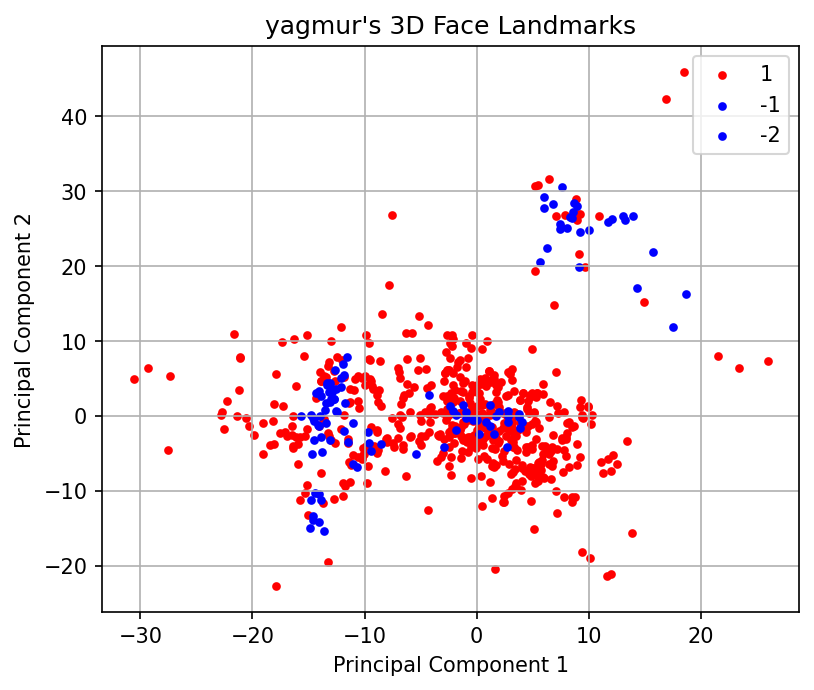

In [66]:
from tueplots import figsizes, fonts
from tueplots.constants.color import palettes

fonts.neurips2021()
plt.rcParams.update({"figure.dpi": 150})


fig = plt.figure(figsize = (6,5))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title(title)

#targets = [2, 1, 0, -1, -2]
#colors = palettes.pn[:5]

targets = [1, -1, -2]
colors = ['r', 'b', 'b']


for target, color in zip(targets,colors):
    indicesToKeep = labels.values == target
    ax.scatter(principalDf.loc[indicesToKeep, 'pc1']
               , principalDf.loc[indicesToKeep, 'pc2']
               , color = color
               , s = 10)
ax.legend(targets)
ax.grid()

#plt.xlim([-103400, -103700])
#plt.ylim([0, 1000])

plt.show()
fig.savefig('fig/%s-PCA.png' % title)

In [ ]:
## Also we can use Altair vis library for a more interactive view.
import altair as alt

principalDf['label'] = labels

alt.Chart(principalDf).mark_circle(size=60).encode(
    x='PC1',
    y='PC2',
    color='Origin',
    tooltip=['label']
).interactive()

## Multi Correspondance Analysis (PCA for Discrete Variables)

In [19]:
import mca

In [20]:
mca_ben = mca.MCA(dfc.iloc[:,:-2])
mca_ind = mca.MCA(dfc.iloc[:,:-2], benzecri=False)

In [21]:
data = {'Iλ': pd.Series(mca_ind.L),
        'τI': mca_ind.expl_var(greenacre=False, N=16),
        'Zλ': pd.Series(mca_ben.L),
        'τZ': mca_ben.expl_var(greenacre=False, N=16),
        'cλ': pd.Series(mca_ben.L),
        'τc': mca_ind.expl_var(greenacre=True, N=16)}

# 'Indicator Matrix', 'Benzecri Correction', 'Greenacre Correction'
columns = ['Iλ', 'τI', 'Zλ', 'τZ', 'cλ', 'τc']
table2 = pd.DataFrame(data=data, columns=columns).fillna(0)
table2.index += 1
table2.loc['Σ'] = table2.sum()
table2.index.name = 'Factor'

table2

,Iλ,τI,Zλ,τZ,cλ,τc
Factor,,,,,,
1,0.555455,0.130312,0.278436,0.264011,0.278436,0.189853
2,0.493251,0.115719,0.213055,0.202017,0.213055,0.145273
3,0.362037,0.084935,0.103790,0.098413,0.103790,0.070769
4,0.346386,0.081264,0.093352,0.088516,0.093352,0.063652
5,0.309731,0.072664,0.071070,0.067388,0.071070,0.048459
6,0.285587,0.067000,0.058050,0.055043,0.058050,0.039582
7,0.273940,0.064268,0.052240,0.049534,0.052240,0.035620
8,0.254442,0.059693,0.043199,0.040961,0.043199,0.029456
9,0.230548,0.054088,0.033291,0.031566,0.033291,0.022699


In [22]:
mca_ind.inertia, mca_ind.L.sum(), mca_ben.inertia, mca_ben.L.sum()

(4.262489459224602, 4.262489459224604, 1.0546375246954136, 1.0546375246954138)

In [23]:
data = np.array([mca_ben.L[:2], 
                 mca_ben.expl_var(greenacre=True, N=2) * 100]).T
c = pd.DataFrame(data=data, columns=['cλ','%c'], index=range(1,3))
c

,cλ,%c
1,0.278436,18.985299
2,0.213055,14.527255


In [24]:
fs, cos, cont = 'Factor score','Squared cosines', 'Contributions x 1000'
table3 = pd.DataFrame(columns=dfc.index, index=pd.MultiIndex
                      .from_product([[fs, cos, cont], [1,2]]))

table3.loc[fs,    :] = mca_ben.fs_r(N=2).T
table3.loc[cos,   :] = mca_ben.cos_r(N=2).T
table3.loc[cont,  :] = mca_ben.cont_r(N=2).T * 1000

np.round(table3.astype(float), 2)

C:\Users\ASABUNCUOGLU13\AppData\Roaming\Python\Python39\site-packages\mca.py:157: RuntimeWarning: invalid value encountered in true_divide
  return apply_along_axis(lambda _: _/self.dr, 0, self.F[:, :N]**2)


0     1     2     3     4     5     6     7     8     \
Factor score         1  0.59 -0.54 -0.23 -0.01 -0.11 -0.11 -0.11 -0.11 -0.35   
                     2 -0.04  0.10  0.15 -0.00 -0.06 -0.06 -0.06 -0.06  0.02   
Squared cosines      1  0.59  0.25  0.18  0.00  0.03  0.03  0.03  0.03  0.21   
                     2  0.00  0.01  0.08  0.00  0.01  0.01  0.01  0.01  0.00   
Contributions x 1000 1  0.37  0.24  0.08  0.00  0.01  0.01  0.01  0.01  0.10   
                     2  0.00  0.01  0.05  0.00  0.01  0.01  0.01  0.01  0.00   

                        9     ...  6958  6959  6960  6961  6962  6963  6964  \
Factor score         1 -0.35  ... -0.32 -0.32 -0.32 -0.32 -0.32 -0.32 -0.32   
                     2  0.02  ...  0.14  0.14  0.14  0.14  0.14  0.14  0.14   
Squared cosines      1  0.21  ...  0.11  0.11  0.11  0.11  0.11  0.11  0.11   
                     2  0.00  ...  0.02  0.02  0.02  0.02  0.02  0.02  0.02   
Contributions x 1000 1  0.10  ...  0.05  0.05  0.05  0.05  0.05  0.05  0.05   
                     2  0.00  ...  0.01  0.01  0.01  0.01  0.01  0.01  0.01   

                        6965  6967  6968  
Factor score         1 -0.32  0.21  0.50  
                     2  0.14 -0.23  0.24  
Squared cosines      1  0.11  0.16  0.22  
                     2  0.02  0.20  0.05  
Contributions x 1000 1  0.05  0.07  0.20  
                     2  0.01  0.11  0.06  

[6 rows x 5376 columns]

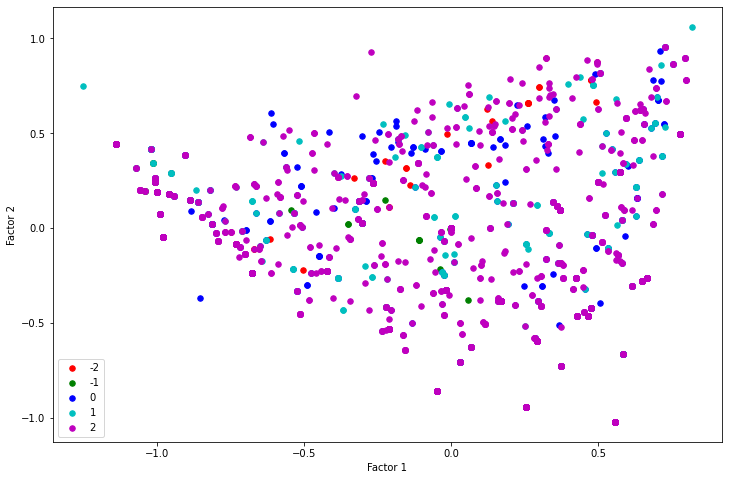

In [25]:
points = table3.loc[fs]

fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(1,1,1) 

ax.set_xlabel('Factor 1')
ax.set_ylabel('Factor 2')

targets = [-2, -1, 0, 1, 2]
colors = ['r', 'g', 'b', 'c', 'm']
for target, color in zip(targets,colors):
    indicesToKeep = (labels.values == target)
    ax.scatter(points.loc[1, indicesToKeep]
               , points.loc[2, indicesToKeep]
               , c = color
               , s = 30)

ax.legend(targets)
plt.show()
fig.savefig('fig/%s-MCA.png' % title)

### Correlation

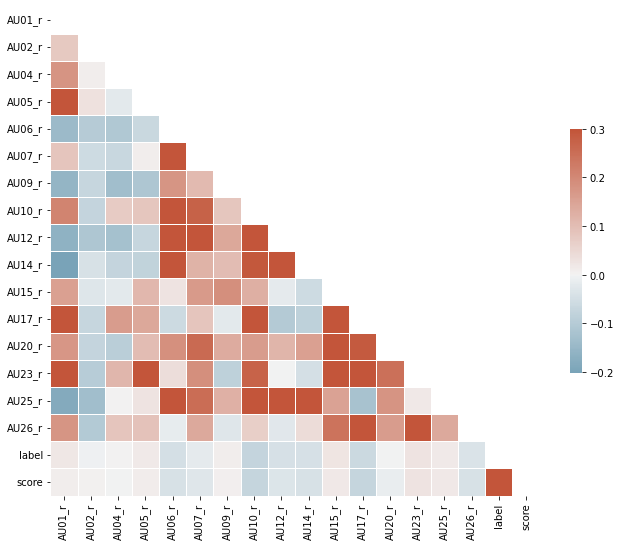

In [33]:
corr = dfc.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
f.savefig('fig/%s-corr.png' % title)

In [34]:
dfc.drop("score", axis=1).apply(lambda x: x.corr(dfc['score']))

AU01_r    0.009155
AU02_r    0.005371
AU04_r   -0.001401
AU05_r    0.009547
AU06_r   -0.043533
AU07_r   -0.029455
AU09_r    0.007007
AU10_r   -0.073838
AU12_r   -0.035655
AU14_r   -0.042640
AU15_r    0.017491
AU17_r   -0.073751
AU20_r   -0.012472
AU23_r    0.027153
AU25_r    0.018115
AU26_r   -0.042814
label     0.976214
dtype: float64

### Profiling

In [ ]:
from pandas_profiling import ProfileReport

profile = ProfileReport(dfc, title="Pandas Profiling Report",
                        #minimal=True,
                        correlations={
                            "pearson": {"calculate": True},
                            "spearman": {"calculate": False},
                            "kendall": {"calculate": True},
                            "phi_k": {"calculate": False},
                        })

In [ ]:
#profile.to_widgets()
#profile.to_notebook_iframe()
profile.to_file("openface-berk-report.html")

## Prosodic Features

In [ ]:
base_dir = "../sound/features/"

In [ ]:
# Load data
df = pd.read_csv(os.path.join(base_dir, 'all.tsv'), delimiter='\t', header=None)
df= df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
label = df.iloc[:,-1]
df = df.iloc[:,:-2]
df.head()